In [11]:
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib
import astropy.units as u
import astropy.coordinates as coord
from astroquery.vizier import Vizier
%matplotlib inline
from astropy.io import fits
from astroquery.simbad import Simbad
import matplotlib
import aplpy
from astroquery.sdss import SDSS
from astropy.coordinates import Angle
from array import array
from wcsaxes import SphericalCircle
from astropy.table import Table
from astroquery.skyview import SkyView
import matplotlib.patches as patches

In [12]:
#Region of Sky:

RA=196.875
DE=51.0
RA_length=35.625
DE_length=6.0

#Catalogues:

First_Catalogue_Name='LOTSS'
Second_Catalogue_Name='Pulsars'

In [22]:
First_Catalogue_Data= Table.read('data/'+First_Catalogue_Name+'.fit', format='fits')
#print First_Catalogue_Data

Second_Catalogue_Data= Table.read('data/Pulsars_Manchester.fit', format='fits')
print Second_Catalogue_Data

   _RAJ2000      _DEJ2000       RAJ2000    e_RAJ2000    DEJ2000     e_DEJ2000
     deg           deg            deg          s          deg         arcsec 
------------- -------------- ------------- --------- -------------- ---------
         1.52  18.5830555556          1.52       0.2  18.5830555556       4.0
1.75708333333  73.0520555556 1.75708333333       0.2  73.0520555556       0.8
3.57395833333  47.7759444444 3.57395833333      0.04  47.7759444444       0.3
5.82032944444  9.38996416667 5.82032944444     3e-05  9.38996416667     0.001
5.95980472222 -72.0754147222 5.95980472222     9e-05 -72.0754147222    0.0004
6.05783055556 -72.0788447222 6.05783055556     7e-05 -72.0788447222    0.0003
     6.046265 -72.0889272222      6.046265    0.0001 -72.0889272222    0.0004
6.01605805556    -72.0785575 6.01605805556    0.0001    -72.0785575    0.0005
6.03316138889 -72.0776919444 6.03316138889    0.0003 -72.0776919444    0.0007
    6.0279225 -72.0685541667     6.0279225    0.0003 -72.0685541

In [30]:
#First Catalogue:

#Making array of coords and errors
n=0
RA_First=[]
DE_First=[]
RA_First_e=[]
DE_First_e=[]
while n< len(First_Catalogue_Data):
    if RA-RA_length<First_Catalogue_Data["_RAJ2000"][n] and First_Catalogue_Data["_RAJ2000"][n]<RA+RA_length and DE-DE_length<First_Catalogue_Data["_DEJ2000"][n] and First_Catalogue_Data["_DEJ2000"][n]<DE+DE_length:
        RA_First.append(First_Catalogue_Data["_RAJ2000"][n])
        DE_First.append(First_Catalogue_Data["_DEJ2000"][n])
        RA_First_e.append(First_Catalogue_Data["e_RAdegtot"][n]/3600)
        DE_First_e.append(First_Catalogue_Data["e_DEdegtot"][n]/3600)
    n=n+1

#Second Catalogue:

#Making array of coords and errors

n=0
RA_Second=[]
DE_Second=[]
RA_Second_e=[]
DE_Second_e=[]
while n< len(Second_Catalogue_Data):
    if RA-RA_length<Second_Catalogue_Data["_RAJ2000"][n] and Second_Catalogue_Data["_RAJ2000"][n]<RA+RA_length and DE-DE_length<Second_Catalogue_Data["_DEJ2000"][n] and Second_Catalogue_Data["_DEJ2000"][n]<DE+DE_length:
            RA_Second.append(Second_Catalogue_Data["_RAJ2000"][n])
            DE_Second.append(Second_Catalogue_Data["_DEJ2000"][n])
            RA_Second_e.append(Second_Catalogue_Data["e_RAJ2000"][n]/60)
            DE_Second_e.append(Second_Catalogue_Data["e_DEJ2000"][n]/3600)
#             RA_Second_e.append(Second_Catalogue_Data["e_RAdeg"][n])
#             DE_Second_e.append(Second_Catalogue_Data["e_DEdeg"][n])
    n=n+1


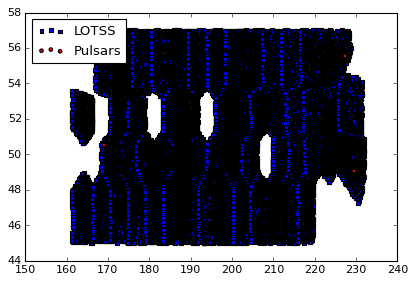

In [31]:
#Plotting coords of two arrays to compare

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(RA_First, DE_First, s=10, c='b', marker="s", label=First_Catalogue_Name)
ax1.scatter(RA_Second,DE_Second, s=10, c='r', marker="o", label=Second_Catalogue_Name)
plt.legend(loc='upper left');
plt.show()

In [33]:
#Finding data for all the stars that overlap


RA_First_Relevant=[]
RA_Second_Relevant=[]
DE_First_Relevant=[]
DE_Second_Relevant=[]
f=0
s=0
it=0
corr=0

# RA_Second_e=15.0/3600.0
# DE_Second_e=15.0/3600.0

#While loop goes through all of first catalogue..
while f<len(RA_First):
    #If it compares a source in first catalogue to every source in second without finding one in common then..
    if s>=len(RA_Second):
        #It moves on to next source in first and..
        f=f+1
        #Starts comparing it to the first source in the second catalogue
        s=0
    #This is a formula for overlapping rectangles with the sides being the error
    #If this is true catalogues have that source in common
    
    elif RA_First_e[f]+RA_Second_e[s]>= abs(RA_First[f]-RA_Second[s]) and DE_First_e[f]+DE_Second_e[s]>= abs(DE_First[f]-DE_Second[s]):
    #elif RA_First_e[f]+RA_Second_e>= abs(RA_First[f]-RA_Second[s]) and DE_First_e[f]+DE_Second_e>= abs(DE_First[f]-DE_Second[s]):
        #print coords 
        print corr+1,":"
        print First_Catalogue_Name," Coords: (",RA_First[f],",",DE_First[f],")"
        print Second_Catalogue_Name," Coords: (",RA_Second[s],",",DE_Second[s],")"
        print ""
        #Making arrays of coordinates of sources in common 
        RA_First_Relevant.append(RA_First[s])
        RA_Second_Relevant.append(RA_Second[s])
        DE_First_Relevant.append(DE_First[s])
        DE_Second_Relevant.append(DE_Second[s])
        
        
        Simbad_table=Simbad.query_region(coord.SkyCoord(RA_Second[s], DE_Second[s],unit=(u.deg, u.deg)),radius='0d0m15s')
        #If no source is found on Simbad then..
        if not Simbad_table:
            #..print this:
            print "==>no source found on SIMBAD"
        #If there is source(s) found then...
        else:
            #print relevant information from Simbad
            print Simbad_table["MAIN_ID","RA","DEC"]
            print "http://simbad.u-strasbg.fr/simbad/sim-id?Ident="+(Simbad_table["MAIN_ID"][0].replace("+","%2B")).replace(" ", "+")+"&NbIdent=1&Radius=10&Radius.unit=arcsec&submit=submit+id"
        
        #Move onto next source in first catalogue
        f=f+1
        #Starts comparing it to the first source in the second catalogue
        s=0
        #Number of common sources increased
        corr=corr+1
    #If neither of these are true then..
    else:
        #Try next source in second catalogue
        s=s+1
    #Before going onto next loop increase number of iterations
    it=it+1

1 :
LOTSS  Coords: ( 229.57002 , 49.07613 )
Pulsars  Coords: ( 229.569996111 , 49.0761808333 )

   MAIN_ID          RA          DEC     
                 "h:m:s"      "d:m:s"   
-------------- ------------ ------------
PSR J1518+4904 15 18 16.832 +49 04 34.19
http://simbad.u-strasbg.fr/simbad/sim-id?Ident=PSR+J1518%2B4904&NbIdent=1&Radius=10&Radius.unit=arcsec&submit=submit+id


In [19]:
print "Number of iterations:",it
print "Number of stars corrolated:",corr

Number of iterations: 950613
Number of stars corrolated: 0


/Users/niallbradley/anaconda/lib/python2.7/site-packages/aplpy/labels.py:432: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if self.coord == x or self.axis.apl_tick_positions_world[ipos] > 0:


INFO: Auto-setting vmin to  2.548e+03 [aplpy.core]
INFO: Auto-setting vmax to  7.567e+03 [aplpy.core]


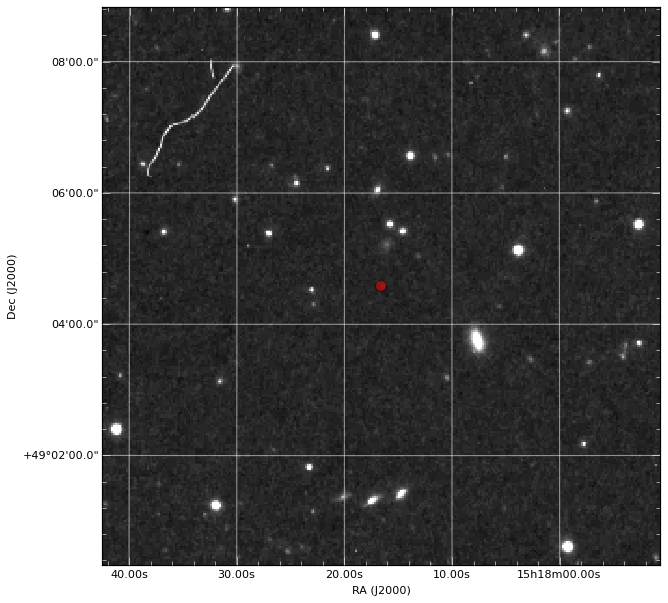

In [8]:
#This displays image of a correlated source

#Which source to show:
x=0

#Coordinates of this source:
pos=coord.SkyCoord(RA_Second_Relevant[x]*u.deg, DE_Second_Relevant[x]*u.deg)
ra=np.array([RA_Second_Relevant[x]])
de=np.array([DE_Second_Relevant[x]])

#Find image from DSS:
images = SkyView.get_images(pos,survey=['DSS'])
print images[0]

CV = aplpy.FITSFigure(images[0])

#Gives in grid and makes it grayscale (can also be made colorscale)
CV.show_grayscale()
CV.add_grid()

#This plots a circle where the relevant source should be 
x_pix, y_pix = CV.world2pixel(ra,de)
plt.scatter(x_pix, y_pix, s=100, c='red', alpha=.5)
plt.show()

In [9]:
# #Which source to show:
# x=0

# #Coordinates of this star:
# pos=coord.SkyCoord(RA_Second_Relevant[x]*u.deg, DE_Second_Relevant[x]*u.deg)
# ra=np.array([RA_Second_Relevant[x]])
# de=np.array([DE_Second_Relevant[x]])

# #Find image from SDSS:
# images = SDSS.get_images(pos)
# CV = aplpy.FITSFigure(images[0])

# #Gives in grid and makes it grayscale (can also be made colorscale)
# CV.show_grayscale()
# CV.add_grid()

# #This plots a circle where the relevant source should be 
# x_pix, y_pix = CV.world2pixel(ra,de)
# plt.scatter(x_pix, y_pix, s=100, c='red', alpha=.5)
# plt.show()